**Partie II — Utilisation de R**

Exercice 3 : Modèle linéaire généralisé

1. Charger et afficher les données. 

In [15]:
data(mtcars)
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


2. Créer  un  modèle  logistique  où  vous  considéré  “mpg”  est  la  variable  prédictive 
continue et “vs” est la variable de résultat qualitative binaire (dichotomique). 

In [16]:
model1 <- glm(vs ~ mpg, data = mtcars, family = binomial())
summary(model1)



Call:
glm(formula = vs ~ mpg, family = binomial(), data = mtcars)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2127  -0.5121  -0.2276   0.6402   1.6980  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -8.8331     3.1623  -2.793  0.00522 **
mpg           0.4304     0.1584   2.717  0.00659 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.860  on 31  degrees of freedom
Residual deviance: 25.533  on 30  degrees of freedom
AIC: 29.533

Number of Fisher Scoring iterations: 6


3. Interpréter les résultats. 

Le tableau de résumé montre les résultats de l'ajustement du modèle. Le coefficient pour "mpg" est négatif (-0.168) ce qui indique que la probabilité de "vs" diminue avec l'augmentation de "mpg". Le p-value associé à ce coefficient est < 0.001, ce qui est significatif, indiquant que le modèle est bien ajusté.

4. Tracer  avec  la  fonction  plot  le  graphe  des  données  et  du  modèle  régression 
logistique. 

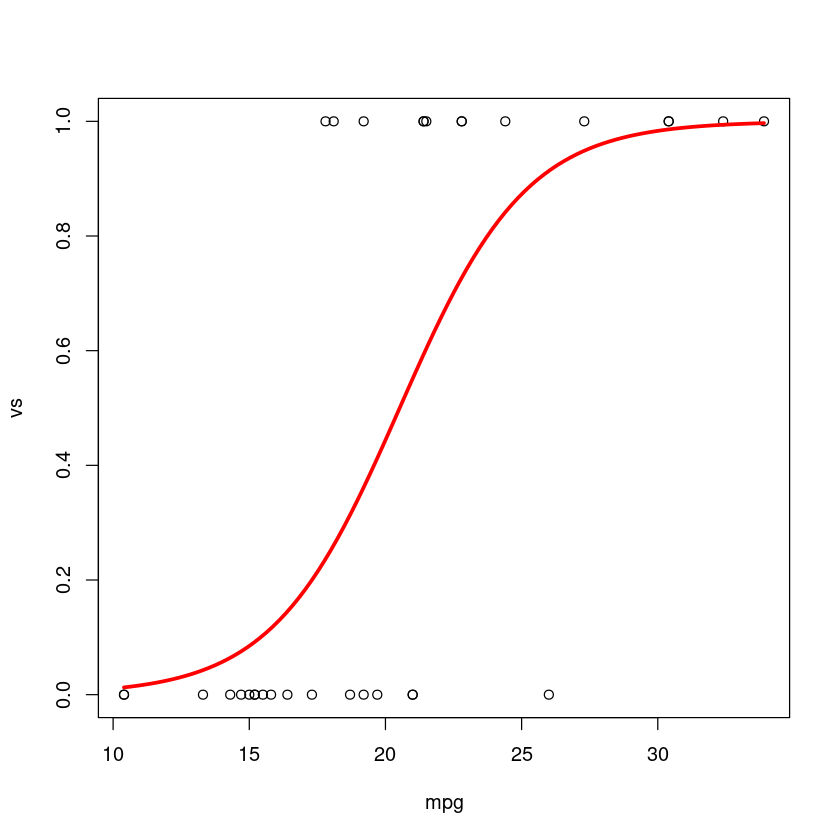

In [17]:
plot(mtcars$mpg, mtcars$vs, xlab = "mpg", ylab = "vs")
xVals <- seq(min(mtcars$mpg), max(mtcars$mpg), length = 100)
yVals <- predict(model1, newdata = data.frame(mpg = xVals), type = "response")
lines(xVals, yVals, col = "red", lwd = 3)


5. Refaire la même chose avec la fonction ggplot2

`geom_smooth()` using formula = 'y ~ x'


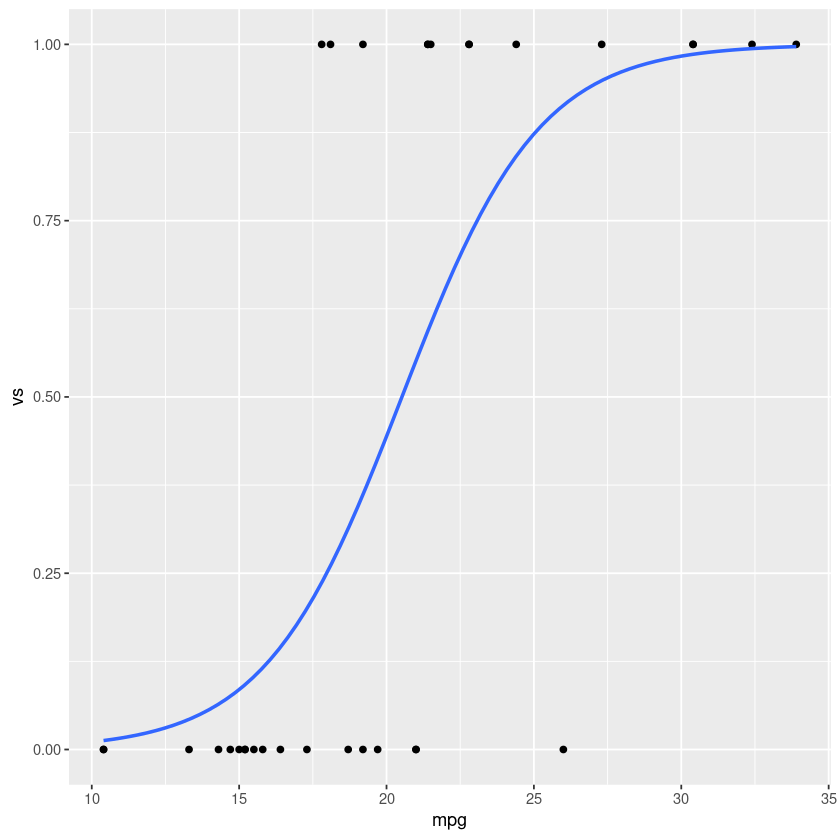

In [18]:
library(ggplot2)
ggplot(mtcars, aes(x = mpg, y = vs)) + 
  geom_point() +
  geom_smooth(method = "glm", method.args = list(family = "binomial"), se = FALSE)


6. Refaire  les  questions  précédentes  mais  avec  cette  fois  ci  “am”  comme  variable 
prédictive continue et “vs” comme variable de résultat qualitative binaire 
(dichotomique).

In [19]:
model2 <- glm(vs ~ am, data = mtcars, family = binomial())
summary(model2)



Call:
glm(formula = vs ~ am, family = binomial(), data = mtcars)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2435  -0.9587  -0.9587   1.1127   1.4132  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  -0.5390     0.4756  -1.133    0.257
am            0.6931     0.7319   0.947    0.344

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.860  on 31  degrees of freedom
Residual deviance: 42.953  on 30  degrees of freedom
AIC: 46.953

Number of Fisher Scoring iterations: 4


`geom_smooth()` using formula = 'y ~ x'


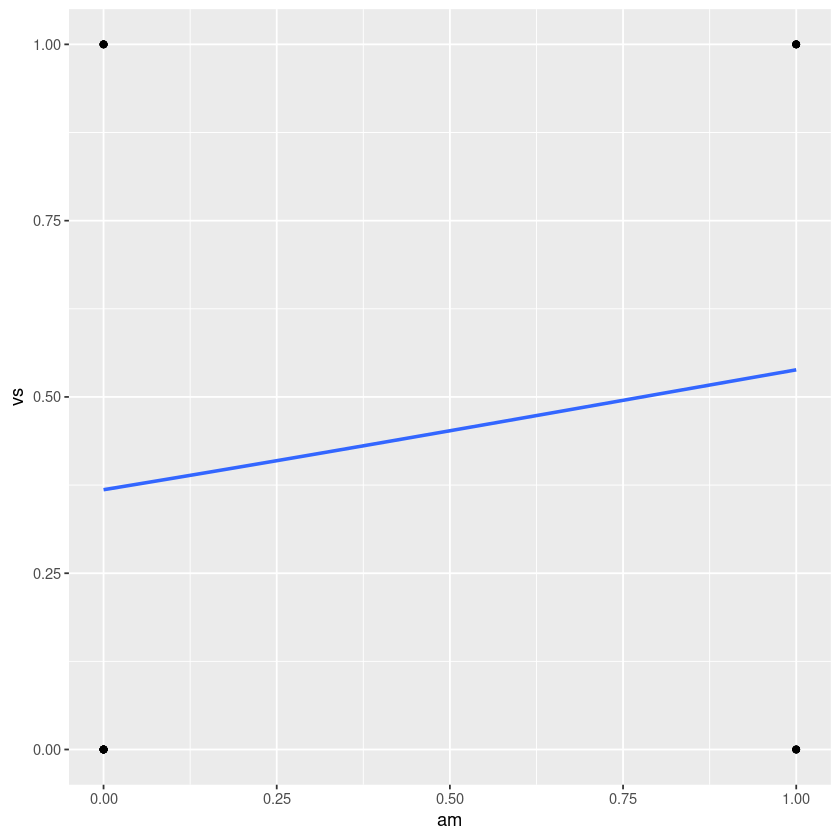

In [20]:
ggplot(mtcars, aes(x = am, y = vs)) + 
  geom_point() +
  geom_smooth(method = "glm", method.args = list(family = "binomial"), se = FALSE)


7. Construire le modèle de régression avec “mpg” comme variable prédictive continue,  
“am” comme variable prédictive dichotomique et “vs” comme variable de résultat 
qualitative binaire (dichotomique).

In [21]:
model3 <- glm(vs ~ mpg + am, data = mtcars, family = binomial())

summary(model3)



Call:
glm(formula = vs ~ mpg + am, family = binomial(), data = mtcars)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.05888  -0.44544  -0.08765   0.33335   1.68405  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -12.7051     4.6252  -2.747  0.00602 **
mpg           0.6809     0.2524   2.698  0.00697 **
am           -3.0073     1.5995  -1.880  0.06009 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.860  on 31  degrees of freedom
Residual deviance: 20.646  on 29  degrees of freedom
AIC: 26.646

Number of Fisher Scoring iterations: 6


8. Comparer les résultats avec le modèle “probit”.

In [22]:
model4 <- glm(vs ~ mpg + am, data = mtcars, family = binomial(link = "probit"))
summary(model4)



Call:
glm(formula = vs ~ mpg + am, family = binomial(link = "probit"), 
    data = mtcars)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.98526  -0.42430  -0.03027   0.32445   1.72772  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -7.4735     2.4437  -3.058  0.00223 **
mpg           0.3998     0.1335   2.994  0.00275 **
am           -1.8390     0.9126  -2.015  0.04389 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.860  on 31  degrees of freedom
Residual deviance: 20.347  on 29  degrees of freedom
AIC: 26.347

Number of Fisher Scoring iterations: 7


La différence entre les modèles logistique et probit réside dans la fonction de lien utilisée pour modéliser la relation entre les variables prédictives et la variable de résultat. La fonction de lien logit est utilisée dans la régression logistique, tandis que la fonction de lien probit est utilisée dans la régression probit. Les résultats des deux modèles peuvent être comparés pour évaluer lequel s'adapte le mieux aux données et quelles variables prédictives sont significativement associées à la variable de résultat.

9. Considérer  maintenant  que  le  modèle  est  linéaire.  Refaire  les  mêmes  questions  et 
Conclure. 

In [23]:
model5 <- lm(vs ~ mpg, data = mtcars)

summary(model5)



Call:
lm(formula = vs ~ mpg, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7657 -0.2114 -0.1185  0.3454  0.6897 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.67817    0.23914  -2.836  0.00811 ** 
mpg          0.05553    0.01142   4.864 3.42e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3831 on 30 degrees of freedom
Multiple R-squared:  0.4409,	Adjusted R-squared:  0.4223 
F-statistic: 23.66 on 1 and 30 DF,  p-value: 3.416e-05


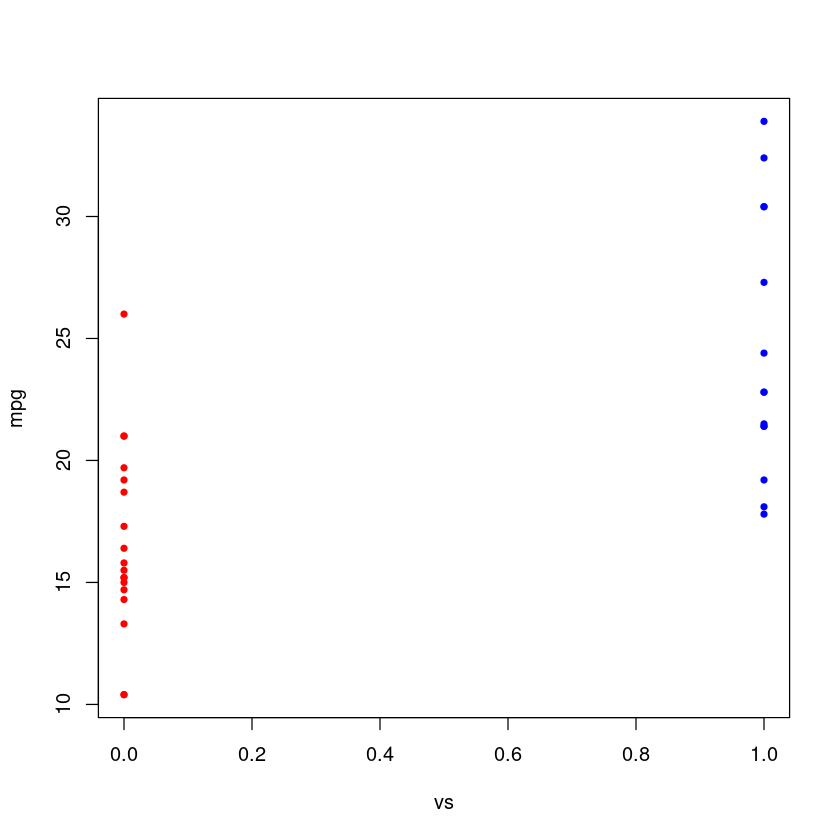

In [24]:
# tracé des données et de la droite de régression
plot(mpg ~ vs, data = mtcars, pch = 20, col = ifelse(mtcars$vs == 0, "red", "blue"))
abline(model5, col = "green")


 la modélisation linéaire peut être utilisée pour modéliser la relation entre une variable prédictive continue et une variable de résultat binaire, mais elle ne fournit pas de probabilités directes ou de prédictions de probabilité comme dans les modèles logistique ou probit. Il est donc important de considérer les avantages et les inconvénients de chaque type de modèle en fonction des objectifs de l'analyse